# DAAD Data Visualization

In this notebook we are going to visualizate the most importante features from the DAAD data base for International Programmes

Index
- Imports
- Data preparation
- Data visualization
- Conlucion

## Imports

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Data preparation


In [2]:
programmes_df = pd.read_csv('./Database/DAAD_data_base_featured.csv',)

In [3]:
programmes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 58 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Course ID                                            1705 non-null   int64  
 1   University                                           1705 non-null   object 
 2   Programme                                            1705 non-null   object 
 3   Degree                                               1705 non-null   object 
 4   Teaching language                                    1705 non-null   object 
 5   Languages                                            1705 non-null   object 
 6   Programme duration                                   1705 non-null   object 
 7   Beginning                                            1705 non-null   object 
 8   Application deadline                                 1705 non-null  

In [4]:
programmes_df.columns


Index(['Course ID', 'University', 'Programme', 'Degree', 'Teaching language',
       'Languages', 'Programme duration', 'Beginning', 'Application deadline',
       'Tuition fees per semester in EUR', 'Description/content',
       'Integrated internships',
       'Course-specific, integrated German language courses',
       'Semester contribution', 'Academic admission requirements',
       'Language requirements', 'Submit application to', 'Accommodation',
       'Possibility of finding part-time employment', 'City', 'English',
       'German', 'Other Language', 'Duration_in_semesters',
       'Beginning_in_Winter', 'Beginning_in_Summer', 'Beginning_in_Any_time',
       'Beginning_in_Other', 'Deadline_in_January', 'Deadline_in_February',
       'Deadline_in_March', 'Deadline_in_April', 'Deadline_in_May',
       'Deadline_in_June', 'Deadline_in_July', 'Deadline_in_August',
       'Deadline_in_September', 'Deadline_in_October', 'Deadline_in_November',
       'Deadline_in_December', 'Master

In [5]:
col_to_analyze = ['Course ID','University','Degree','Tuition fees per semester in EUR','City', 'English',
       'German', 'Other Language', 'Duration_in_semesters',
       'Beginning_in_Winter', 'Beginning_in_Summer', 'Beginning_in_Any_time',
       'Beginning_in_Other', 'Deadline_in_January', 'Deadline_in_February',
       'Deadline_in_March', 'Deadline_in_April', 'Deadline_in_May',
       'Deadline_in_June', 'Deadline_in_July', 'Deadline_in_August',
       'Deadline_in_September', 'Deadline_in_October', 'Deadline_in_November',
       'Deadline_in_December', 'Master', 'PhD', 'Bachelor',
       'Contribution per semester', 'Total contribution', 'admin_name',
       'population', 'Master of Science', 'Master of Arts', 'MBA',
       'Master of Engineering', 'Master of Laws', 'Science', 'Arts',
       'Business', 'Engineering', 'Laws', 'Data']

In [6]:
programmes = programmes_df.copy()
programmes = programmes.loc[:,col_to_analyze]

In [34]:
programmes.rename(columns={'admin_name':'Federal State'},inplace=True)

In [7]:
programmes

Course ID                                         University  \
0          4000                 Friedrich Schiller University Jena   
1          4001                             University of Augsburg   
2          4002                       Philipps-Universität Marburg   
3          4003                            University of Stuttgart   
4          4004                              University of Cologne   
5          4005                 Friedrich Schiller University Jena   
6          4006                            Ruhr-Universität Bochum   
7          4007                      Technische Universität Berlin   
8          4008           FH Aachen University of Applied Sciences   
9          4009           FH Aachen University of Applied Sciences   
10         4010                              University of Münster   
11         4011           FH Aachen University of Applied Sciences   
12         4012                           Freie Universität Berlin   
13         4013                           Freie Universität Berlin   
14         4014                            University of Stuttgart   
15         4015                            University of Göttingen   
16         4016                              FAU Erlangen-Nürnberg   
17         4017                               University of Passau   
18         4018                           TU Bergakademie Freiberg   
19         4019             Ludwig-Maximilians-Universität München   
20         4020  Helmholtz Centre for Environmental Research - UFZ   
21         4021                                 Leipzig University   
22         4022             Hamburg University of Applied Sciences   
23         4023                              University of Cologne   
24         4024                       Philipps-Universität Marburg   
25         4025             Hamburg University of Applied Sciences   
26         4026  Brandenburg University of Technology Cottbus-S...   
27         4027             Hamburg University of Applied Sciences   
28         4028                              University of Münster   
29         4029             Hamburg University of Applied Sciences   
30         4030           Offenburg University of Applied Sciences   
31         4031                            University of Göttingen   
32         4032             Ludwig-Maximilians-Universität München   
33         4033             Ludwig-Maximilians-Universität München   
34         4034                                 University of Bonn   
35         4035               Charité - Universitätsmedizin Berlin   
36         4036                          SRH University Heidelberg   
37         4037          SRH Berlin University of Applied Sciences   
38         4039                             University of Konstanz   
39         4040           TH Köln (University of Applied Sciences)   
40         4042                             University of Konstanz   
41         4043                     Humboldt-Universität zu Berlin   
42         4044                             University of Bayreuth   
43         4045                             University of Bayreuth   
44         4046                              FAU Erlangen-Nürnberg   
45         4047                         Hochschule Bonn-Rhein-Sieg   
46         4048                           Jacobs University Bremen   
47         4049              Anhalt University of Applied Sciences   
48         4050     Max Planck Institute of Microstructure Physics   
49         4051                                 Leipzig University   
50         4052                              University of Münster   
51         4053                              University of Münster   
52         4054                                Universität Hamburg   
53         4055                       Philipps-Universität Marburg   
54         4056                            University of Göttingen   
55         4057              Anhalt University of Applied Sciences   
56         4058 

## Data visualization

Different types of information
- Language
- Type of study
- Costs
- Type of programmes
- Geography with cost and types of programems
- Times (When deadline, when they start)



### Languages

In [8]:
eng = programmes['English'].sum()
ger = programmes['German'].sum()
other = programmes['Other Language'].sum()

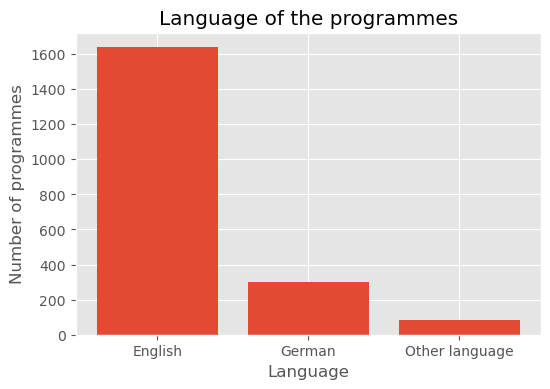

In [9]:
plt.style.use('ggplot')
plt.figure(dpi=100)
plt.title('Language of the programmes')
plt.ylabel('Number of programmes')
plt.xlabel('Language')
plt.bar(['English','German','Other language'] ,[eng,ger,other])
plt.show()

Most of the international programmes in the DAAD Data base are programmes taugh in ENGLISH. In addition, some programmes are taugh in English and German

### Type of studies

In [10]:
master = programmes['Master'].sum()
doctor = programmes['PhD'].sum()
bachelor = programmes['Bachelor'].sum()

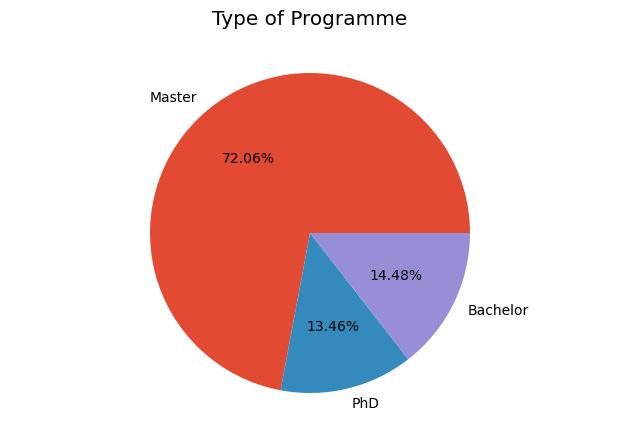

In [11]:
fig = plt.figure(dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['Master', 'PhD', 'Bachelor']
types =[master,doctor,bachelor]

plt.title('Type of Programme')


ax.pie(types, labels = label,autopct='%1.2f%%')
plt.show()

It can be seen in the pie chart that the larger ammount of programmes are Masters, let's see which type of Master

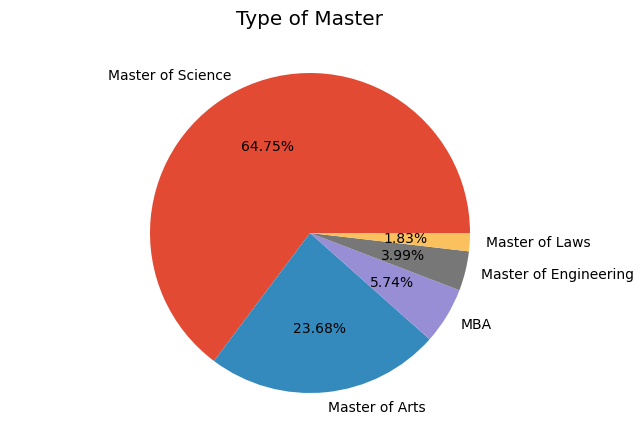

In [12]:
msc= programmes['Master of Science'].sum()
ma= programmes['Master of Arts'].sum()
mba = programmes['MBA'].sum()
meng = programmes['Master of Engineering'].sum()
mol = programmes['Master of Laws'].sum()

# Plot
fig = plt.figure(dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['Master of Science', 'Master of Arts', 'MBA','Master of Engineering', 'Master of Laws']
types =[msc,ma,mba,meng,mol]

plt.title('Type of Master')


ax.pie(types, labels = label,autopct='%1.2f%%')
plt.show()


The pie chart above shows that Master of Science is by far the most common offer in the international programmes in Germany

### Costs

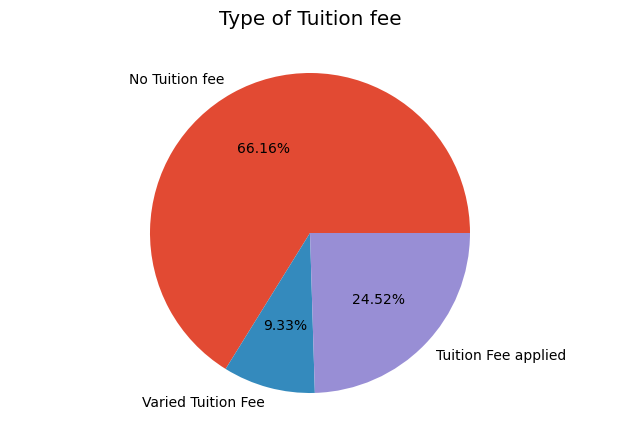

In [13]:
# Tuition Fee costs
no_fee = programmes[programmes['Tuition fees per semester in EUR']==0].count()[0]
varied_fee = programmes[programmes['Tuition fees per semester in EUR']==-1].count()[0]
fee = programmes[programmes['Tuition fees per semester in EUR']!=0][programmes['Tuition fees per semester in EUR']!=-1].count()[0]

# Plot
fig = plt.figure(dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['No Tuition fee','Varied Tuition Fee', 'Tuition Fee applied']
types =[no_fee,varied_fee,fee]

plt.title('Type of Tuition fee')


ax.pie(types, labels = label,autopct='%1.2f%%')
plt.show()

Varied tuition fee means that some of the have tuition and other no, besides that, most of the programmes in Germany are tuition fee excent

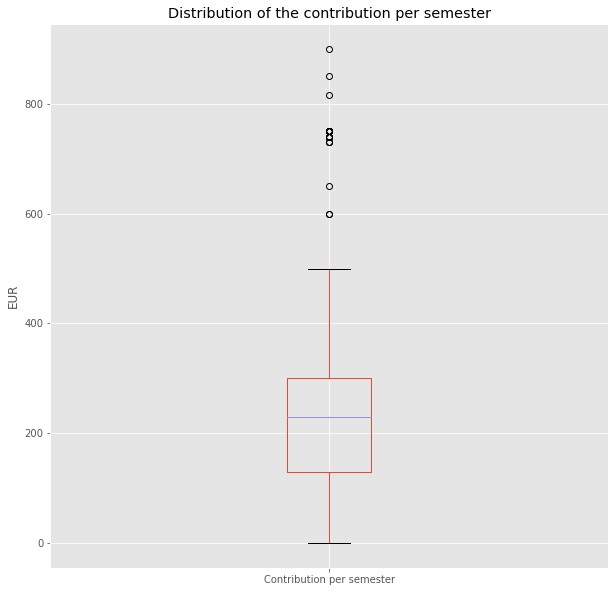

In [14]:
programmes['Contribution per semester'].plot(kind='box',figsize=(10,10))

plt.title('Distribution of the contribution per semester')
plt.ylabel('EUR')
plt.show()

Although, most of the programmes do not required a tuition fee, most of the ask for a contribution per semester: Those one could be like student fees, or transport fees. It can be seen in the boxplot that the average is just over 200 EUR per semester, and 75% of the programmes the contribution is between 0 and 300 EUR. In addition, there are some points that are out range.

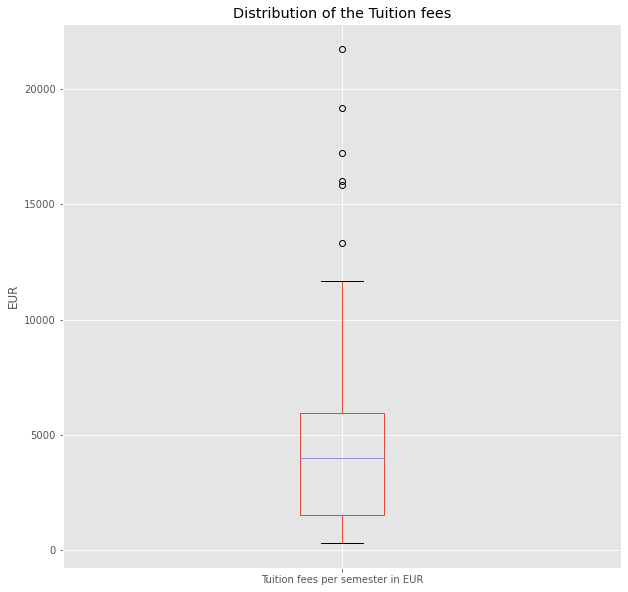

count      418.000000
mean      4287.287081
std       3051.134550
min        300.000000
25%       1500.000000
50%       4010.000000
75%       5937.500000
max      21750.000000
Name: Tuition fees per semester in EUR, dtype: float64

In [15]:
fee_cost = programmes[programmes['Tuition fees per semester in EUR']!=0][programmes['Tuition fees per semester in EUR']!=-1]['Tuition fees per semester in EUR']
fee_cost.plot(kind='box',figsize=(10,10))
plt.title('Distribution of the Tuition fees')
plt.ylabel('EUR')
plt.show()
fee_cost.describe()

It can be seen that 50% of the tuition fee per semester are between 1500 and 6000 EUR. THe maximun value is 21750 EUR per semester.


In [16]:
# Most expensive tuition per semester
programmes.sort_values('Tuition fees per semester in EUR',ascending=False,ignore_index=True)

Course ID                                         University  \
0          7108                                        ESMT Berlin   
1          4135                                        ESMT Berlin   
2          4123                                      Hertie School   
3          3867            Munich Intellectual Property Law Center   
4          4542           Frankfurt School of Finance & Management   
5          3953           EBS Universität für Wirtschaft und Recht   
6          3628           Frankfurt School of Finance & Management   
7          3666                                Bucerius Law School   
8          4048                           Jacobs University Bremen   
9          4630                           Jacobs University Bremen   
10         3616                           Jacobs University Bremen   
11         4128                           Jacobs University Bremen   
12         3898                           Jacobs University Bremen   
13         4631                           Jacobs University Bremen   
14         4653                           Jacobs University Bremen   
15         7123                             RWTH Aachen University   
16         3592                           Jacobs University Bremen   
17         3593                           Jacobs University Bremen   
18         4240                           Jacobs University Bremen   
19         3660                           Jacobs University Bremen   
20         4387             Ludwig-Maximilians-Universität München   
21         3662                           Jacobs University Bremen   
22         3663                           Jacobs University Bremen   
23         3664                           Jacobs University Bremen   
24         3659                           Jacobs University Bremen   
25         3661                           Jacobs University Bremen   
26         3845                        Goethe University Frankfurt   
27         4303                           Jacobs University Bremen   
28         3625         Hochschule für Wirtschaft und Recht Berlin   
29         4432                     Technische Universität München   
30         4089                     Technische Universität München   
31         4431                     Technische Universität München   
32         7075                                        ESMT Berlin   
33         4125           Frankfurt School of Finance & Management   
34         4126           Frankfurt School of Finance & Management   
35         4394                        Goethe University Frankfurt   
36         6566                   Dresden International University   
37         4063                                      Hertie School   
38         4475                                      Hertie School   
39         7169                                      Hertie School   
40         4255           Frankfurt School of Finance & Management   
41         3957           EBS Universität für Wirtschaft und Recht   
42         3955           EBS Universität für Wirtschaft und Recht   
43         4168           EBS Universität für Wirtschaft und Recht   
44         3938           EBS Universität für Wirtschaft und Recht   
45         5516           WHU - Otto Beisheim School of Management   
46         7156                             RWTH Aachen University   
47         3954           EBS Universität für Wirtschaft und Recht   
48         7074          SRH Berlin University of Applied Sciences   
49         4555                  Karlsruhe Institute of Technology   
50         4554                  Karlsruhe Institute of Technology   
51         4552                  Karlsruhe Institute of Technology   
52         4551                  Karlsruhe Institute of Technology   
53         4550                  Karlsruhe Institute of Technology   
54         4874                             RWTH Aachen University   
55         4553                  Karlsruhe Institute of Technology   
56         5359 

In [17]:
# Type of programm more than 10000 per semester
print('Type of programme of more than 9000 per semester')
programmes[programmes['Tuition fees per semester in EUR'] >=9000].sum()[['English','German','Master','PhD','Bachelor','Master of Science','Master of Arts','MBA','Master of Laws', 'Master of Engineering']]

Type of programme of more than 9000 per semester


English                  36
German                    0
Master                   21
PhD                       0
Bachelor                 20
Master of Science         5
Master of Arts            0
MBA                      11
Master of Laws            4
Master of Engineering     0
dtype: object

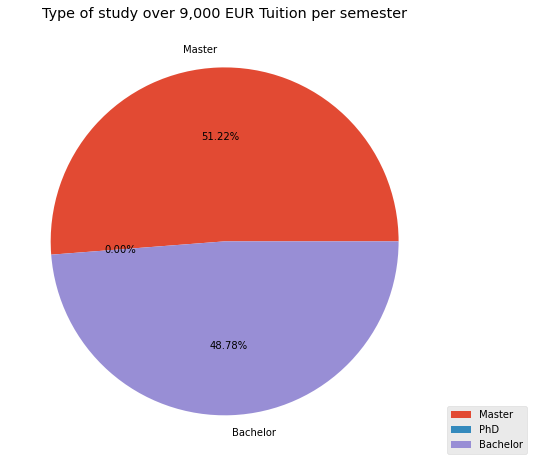

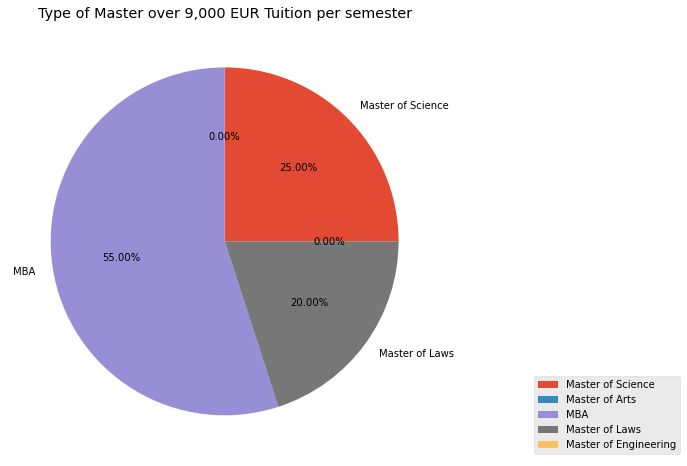

In [18]:
expensive_pr = programmes[programmes['Tuition fees per semester in EUR'] >=9000].sum()

# First Plot
fig1 = plt.figure(1)
plt.title('Type of study over 9,000 EUR Tuition per semester')
expensive_pr[['Master','PhD','Bachelor']].plot(kind='pie',autopct='%1.2f%%',figsize=(8,8))
plt.legend(['Master','PhD','Bachelor'],bbox_to_anchor=(1, 0),loc='lower left')
plt.ylabel("")

# Second Plot
fig2 =plt.figure(2)
expensive_pr[['Master of Science','Master of Arts','MBA','Master of Laws', 'Master of Engineering']].plot(kind='pie',autopct='%1.2f%%',figsize=(8,8))
plt.legend(['Master of Science','Master of Arts','MBA','Master of Laws', 'Master of Engineering'],bbox_to_anchor=(1.2, 0),loc='lower left')
plt.title('Type of Master over 9,000 EUR Tuition per semester')
plt.ylabel("")

plt.show()


The most expensive are the Bacherlor and Masters, moreover, MBA are the most expensives of the last list, following them Master of Science and Master of Laws. In contrast, MAster of Engineering and Arts are the cheepest ones.

### Geography

In [47]:
print('Total cost of the programme per State in EUR')
round(programmes.groupby('Federal State')['Total contribution'].agg(['mean','max']).sort_values(by='mean',ascending=False),ndigits=2)


Total cost of the programme per State in EUR


mean    max
Federal State                                 
Bremen                         19831.62  61800
Berlin                         12796.70  57501
Hamburg                         7589.87  32880
Hesse                           7304.74  48650
Baden-Württemberg               6362.37  42900
Rhineland-Palatinate            5893.58  41700
North Rhine-Westphalia          4573.22  32220
Mecklenburg-Western Pomerania   3251.77  19500
Saxony                          3086.19  30000
Lower Saxony                    2536.66  19800
Saarland                        2186.64  12458
Bavaria                         2039.47  40000
Brandenburg                     2003.40  13400
Saxony-Anhalt                   1203.00   8512
Schleswig-Holstein              1190.88   6309
Thuringia                       1142.37   8640

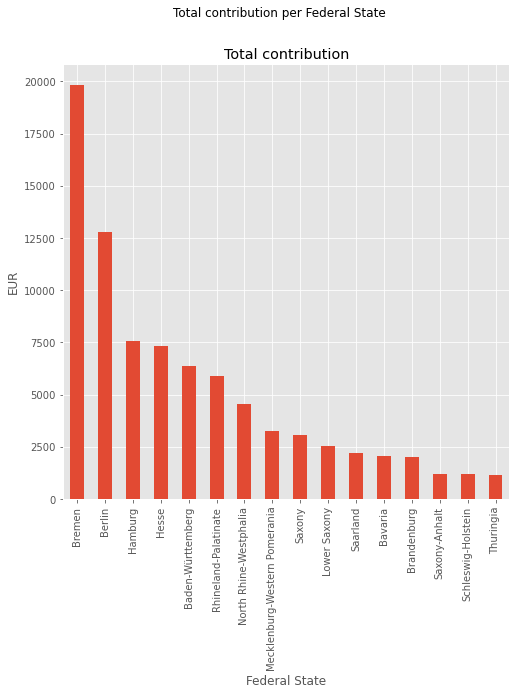

In [84]:
programmes.groupby('Federal State')['Total contribution'].mean().sort_values(ascending=False).plot(kind='bar',subplots=True,figsize=(8,8),title='Total contribution per Federal State')
plt.ylabel('EUR')
plt.xlabel('Federal State')
plt.show()


The most expensive one is the state of Bremen, with a mean of total contribution of almost 20,000 EUR for the whole programme. On the second place is Berlin with a lower average cost of 13,000 EUR. It is really a surprise the average cost in Bavaria (2039 EUR in total)

In [124]:
programmes['Total Programmes'] = programmes['Master']+programmes['PhD']+ programmes['Bachelor']
programmes.groupby('Federal State')['Master','PhD','Bachelor','Total Programmes'].sum().sort_values(by='Total Programmes',ascending=False)

Master  PhD  Bachelor  Total Programmes
Federal State                                                         
Bavaria                           225   46        39               310
North Rhine-Westphalia            214   36        51               301
Baden-Württemberg                 195   29        39               263
Berlin                            114   18        30               162
Lower Saxony                       87   43        18               148
Hesse                              73   11        14                98
Saxony                             68   13        10                91
Rhineland-Palatinate               53    7         8                68
Bremen                             35    3        26                64
Hamburg                            44    6         3                53
Brandenburg                        39    8         4                51
Thuringia                          36    9         1                46
Saxony-Anhalt                      26    4         3                33
Saarland                           18    4         5                27
Schleswig-Holstein                 24    1         1                26
Mecklenburg-Western Pomerania      18    0         4                22

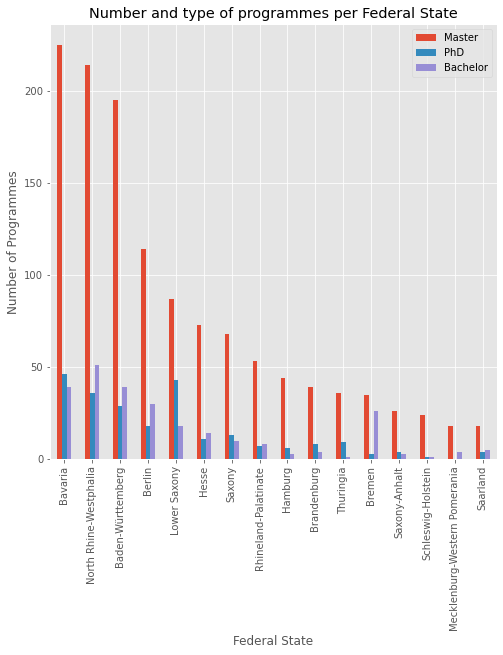

In [128]:
programmes.groupby('Federal State')['Master','PhD','Bachelor'].sum().sort_values(by='Master',ascending=False).plot(kind='bar',figsize=(8,8))
plt.title('Number and type of programmes per Federal State')
plt.ylabel('Number of Programmes')
plt.xlabel('Federal State')
plt.show()

Bavaria is the State that show more amount of programmes, especially Masters

In [139]:
print('Number of Programmes per category and Federal State')
programmes.groupby('Federal State')['Science', 'Arts','Business', 'Engineering', 'Laws', 'Data'].sum().sort_values(by=['Science'], ascending=False)

Number of Programmes per category and Federal State


Science  Arts  Business  Engineering  Laws  \
Federal State                                                               
North Rhine-Westphalia             184    72        11           22     3   
Baden-Württemberg                  160    64        17           20     3   
Bavaria                            150    75        27           31     3   
Lower Saxony                        80    31         3           11     6   
Hesse                               51    23         9            4     4   
Berlin                              49    73        21            8     3   
Saxony                              48    18         6            4     1   
Rhineland-Palatinate                39    15         8            4     0   
Bremen                              35    16        10            4     1   
Hamburg                             35    11         5            5     6   
Brandenburg                         30    10         2            2     0   
Thuringia                           29     8         2            5     0   
Saxony-Anhalt                       20     9         2            2     0   
Schleswig-Holstein                  19     5         1            6     0   
Saarland                            17     4         2            3     1   
Mecklenburg-Western Pomerania        7    11         0            6     0   

                               Data  
Federal State                        
North Rhine-Westphalia            6  
Baden-Württemberg                 8  
Bavaria                           7  
Lower Saxony                      4  
Hesse                             3  
Berlin                            8  
Saxony                            3  
Rhineland-Palatinate              2  
Bremen                            1  
Hamburg                           0  
Brandenburg                       1  
Thuringia                         0  
Saxony-Anhalt                     3  
Schleswig-Holstein                0  
Saarland                          1  
Mecklenburg-Western Pomerania     0

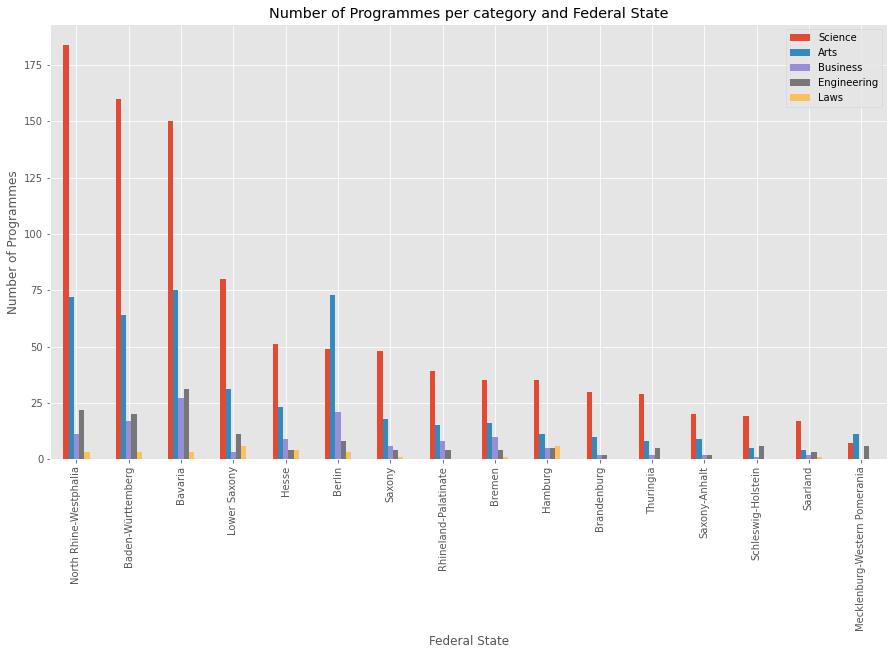

In [154]:
programmes.groupby('Federal State')['Science', 'Arts','Business', 'Engineering', 'Laws'].sum().sort_values(by=['Science'],ascending=False).plot(kind='bar',figsize=(15,8))
plt.title('Number of Programmes per category and Federal State')
plt.xlabel('Federal State')
plt.ylabel('Number of Programmes')
plt.show()

Most of the states have more programmes about science than any other, exept Berlin, where the most common programme is about Arts. On the other hand, North Rhine, Baden and Bavaria are the State with more amount of programmes.

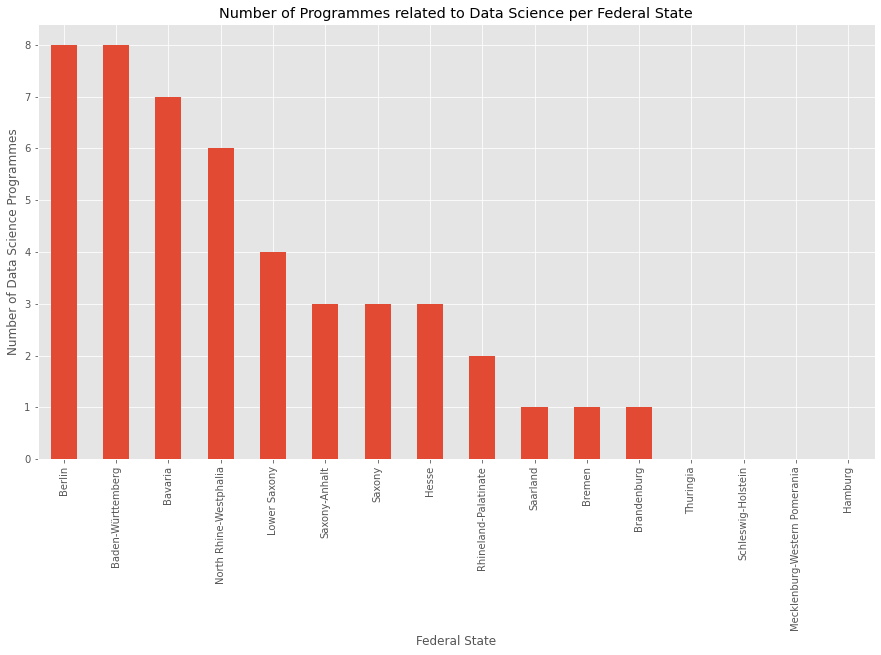

In [166]:
programmes.groupby('Federal State')['Data'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.title('Number of Programmes related to Data Science per Federal State')
plt.xlabel('Federal State')
plt.ylabel('Number of Data Science Programmes')
plt.show()

It can be seen in the graph that Berlin, Baden and Bavaria are the States with more ammount of programmes related to Data Science.

## Conclusion

Germany is a country which offer a wide range of possibilities to study as an international student. Overall, most of their programmes (66.16 %) are tuition free, moreover, most of them are a Master (72 %) where Master of Science is the most common Master available in that country (64.75 %). The States with more availability in this type of Master are North Rhine-W, Baden-W and Bavaria, being this last one the Federal State with a lower costs than the previous ones. Last but not least, Berlin, Baden, and Bavaria are the three states with more amount of programmes related with data science, however, in contrast of Bavaria, Berlin and Baden-W are expensive states for study, their mean total contribution are around 130,000 EUR and 65,000 respectively.

To sum up, Bavaria, Baden-Württemberg, and Rhine-Westphalia are the best states to study Data Science, because of their low costs, their high number of Master Science programmes (more 'Science' State means more demand in the industry of those type of professionals)
